In [1]:
from cim_lib import discrete_CIM as CIM
from cim_lib import plot_spin_beh as plot
from cim_lib import dwave, parser

import numpy as np
import matplotlib.pyplot as plt

In [2]:
cim = CIM(alpha1 = 0.9,
            alpha2 = 0.90,
            b = -0.7,
            J = parser("dataset\G12.txt"))

-640.0


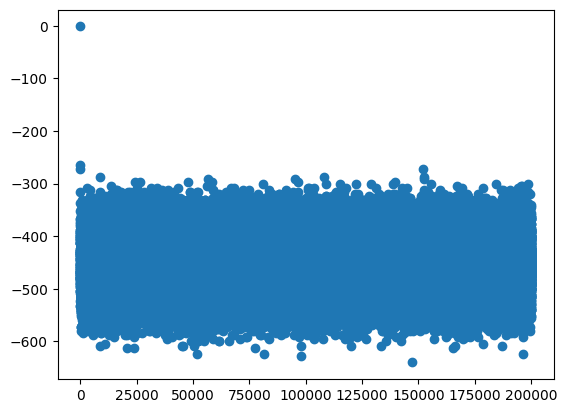

In [5]:
iters = 200000
state, energy = cim.anneal(iters, seed = 2)
print(min(energy))
plt.scatter(range(iters), energy)

In [6]:
from skopt import gp_minimize
from skopt.space import Integer
from skopt.space import Real
from skopt.utils import use_named_args

In [7]:
search_space = [
    Real(-1.5, 1.5, name='alpha1'),
    Real(-1.5, 1.5, name='alpha2'),
    Real(-1.5, 1.5, name='alpha2_end'),
    Real(-1.5, 1.5, name='b'),
    Real(0.0, 0.8, name='noise'),
    ]

In [43]:
@use_named_args(search_space)
def annealing(alpha1, alpha2, alpha2_end, b, noise):
    cim = CIM(alpha1 = alpha1,
            alpha2 = alpha2,
            b = b,
            J = parser("dataset\G67.txt"))
    iters = 1000
    state, energy = cim.test_anneal(alpha1, alpha2, alpha2_end, b, noise, iters = iters, seed = 0)
    return min(energy)

res = gp_minimize(annealing, search_space, n_calls=400)

KeyboardInterrupt: 

In [ ]:
res["x"]

[1.375302709290671,
 -0.7753469039024317,
 -0.02754203263962851,
 -0.16361805569703503,
 0.07151036847702522]

In [ ]:
cim = CIM(alpha1 = res["x"][0],
            alpha2 = res["x"][1],
            b = res["x"][2],
            J = parser("dataset\G67.txt"))

-1098.0


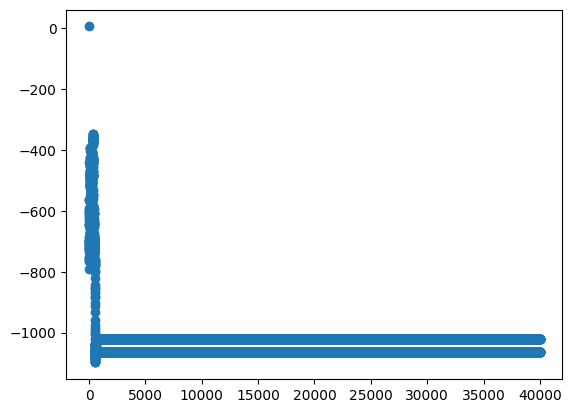

In [ ]:
iters = 40000
state, energy = cim.test_anneal(*res["x"], iters = iters, seed = 0)
print(min(energy))
plt.scatter(range(iters), energy)